In [1]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Read in dataset
survey2018 = pd.read_csv("Resources/survey_results_public.csv")
survey2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
# Print shape of dataset
print('The dataset contains', np.shape(survey2018)[0], 'rows and', np.shape(survey2018)[1], 'columns.')

The dataset contains 98855 rows and 129 columns.


In [5]:
# Drop unwanted columns
survey = survey2018[['Respondent', 'DevType', 'Gender', 'Age', 'TimeAfterBootcamp', 'Salary', 
                 'NumberMonitors', 'JobSearchStatus', 'LanguageWorkedWith', 'YearsCoding', 
                 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction']]

In [9]:
# Delete rows where DevType is missing
survey = survey[pd.notnull(survey['DevType'])]

In [10]:
#what's the new dataSet look like?
print('The reduced dataset contains', np.shape(survey)[0], 'rows and', np.shape(survey)[1], 'columns.')

The reduced dataset contains 92098 rows and 13 columns.


In [11]:
# Display (top 10) value counts for DevType
survey['DevType'].value_counts().nlargest(10)

Back-end developer                                                              6417
Full-stack developer                                                            6104
Back-end developer;Front-end developer;Full-stack developer                     4460
Mobile developer                                                                3518
Student                                                                         3222
Back-end developer;Full-stack developer                                         3128
Front-end developer                                                             2608
Front-end developer;Full-stack developer                                        1117
Back-end developer;Front-end developer                                          1030
Back-end developer;Front-end developer;Full-stack developer;Mobile developer    1008
Name: DevType, dtype: int64

In [12]:
data_scientist_survey = survey[survey['DevType'].str.contains('Data scientist') == True]
data_scientist_survey.head()

,Respondent,DevType,Gender,Age,TimeAfterBootcamp,Salary,NumberMonitors,JobSearchStatus,LanguageWorkedWith,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction
18,29,Data or business analyst;Data scientist or mac...,Female,NaN,NaN,NaN,More than 4,"I’m not actively looking, but I am open to new...",C;C++;C#,0-2 years,3-5 years,Slightly satisfied,Extremely satisfied
28,45,Back-end developer;Data scientist or machine l...,NaN,NaN,NaN,NaN,NaN,I am not interested in new job opportunities,NaN,6-8 years,3-5 years,Extremely satisfied,Extremely satisfied
40,60,Data scientist or machine learning specialist;...,NaN,NaN,NaN,NaN,1,NaN,C++;Java;JavaScript;Python;R;Swift,9-11 years,NaN,NaN,NaN
62,91,Back-end developer;Data scientist or machine l...,Male,25 - 34 years old,I already had a full-time job as a developer w...,120000,2,"I’m not actively looking, but I am open to new...",C;F#;Haskell;Python;Scala,12-14 years,6-8 years,Moderately satisfied,Neither satisfied nor dissatisfied
86,129,Back-end developer;Data scientist or machine l...,Male,18 - 24 years old,NaN,120000,1,"I’m not actively looking, but I am open to new...",Assembly;C++;JavaScript;Matlab;Perl;Python;SQL...,6-8 years,0-2 years,Neither satisfied nor dissatisfied,Moderately dissatisfied


In [13]:
#what's the new dataSet look like?
print('There are', len(data_scientist_survey), 'rows in the data scientist dataframe.')

There are 7088 rows in the data scientist dataframe.


In [14]:
# Age Matters
data_scientist_survey['Age'].value_counts()

25 - 34 years old     2512
18 - 24 years old     1194
35 - 44 years old      855
45 - 54 years old      261
Under 18 years old     117
55 - 64 years old       83
65 years or older       15
Name: Age, dtype: int64

In [15]:
# Bootcamp Matters Survey Question: You indicated previously that you went through a developer training program or bootcamp. 
#How long did it take you to get a full-time job as a developer after graduating?
tabc = data_scientist_survey['TimeAfterBootcamp'].value_counts()
print(data_scientist_survey['TimeAfterBootcamp'].value_counts())

I already had a full-time job as a developer when I began the program    268
Immediately after graduating                                              85
I haven’t gotten a developer job                                          65
One to three months                                                       40
Less than a month                                                         28
Four to six months                                                        22
Six months to a year                                                      14
Longer than a year                                                        14
Name: TimeAfterBootcamp, dtype: int64


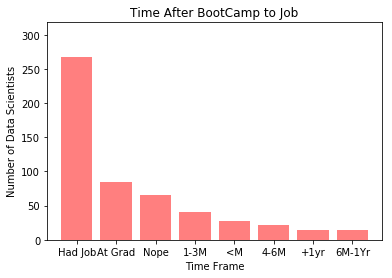

In [16]:
x_axis = np.arange(len(tabc))
plt.bar(x_axis, tabc, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Had Job", "At Grad", "Nope", "1-3M", "<M", "4-6M", "+1yr", "6M-1Yr"])
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(tabc)+50)
plt.title("Time After BootCamp to Job")
plt.xlabel("Time Frame")
plt.ylabel("Number of Data Scientists")
_ = plt.plot()

In [17]:
#How many monitors is enough? 
monitors = data_scientist_survey['NumberMonitors'].value_counts()
print(data_scientist_survey['NumberMonitors'].value_counts())

2              2997
1              1917
3               739
More than 4      93
4                90
Name: NumberMonitors, dtype: int64


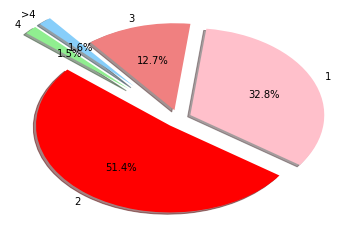

In [53]:
# Labels for the sections of our pie chart
labels = ["2", "1", "3", ">4", '4']

# The colors of each section of the pie chart
colors = ["red", "pink", "lightcoral", "lightskyblue", 'lightgreen']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, .1, .1, .5, .5)

plt.pie(monitors, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

_ = plt.plot()

# Job Satisfaction

In [18]:
#I can't get no... 
#Job Satisfaction Counts 
job_sat = data_scientist_survey['JobSatisfaction'].value_counts()
print(data_scientist_survey['JobSatisfaction'].value_counts())

Moderately satisfied                  2045
Extremely satisfied                   1165
Slightly satisfied                     728
Slightly dissatisfied                  448
Moderately dissatisfied                437
Neither satisfied nor dissatisfied     345
Extremely dissatisfied                 207
Name: JobSatisfaction, dtype: int64


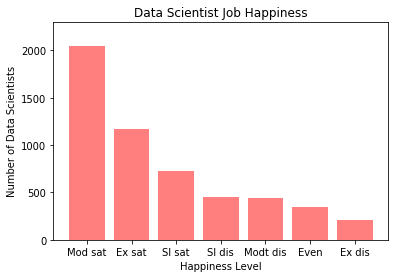

In [52]:
x_axis = np.arange(len(job_sat))
plt.bar(x_axis, job_sat, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Mod sat", "Ex sat", "Sl sat", "Sl dis", "Modt dis", "Even", "Ex dis"])
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(job_sat)+250)
plt.title("Data Scientist Job Satisfaction")
plt.xlabel("Happiness Level")
plt.ylabel("Number of Data Scientists")
_ = plt.plot()

# Career Satisfaction

In [19]:
#I can't get no... 
#Career Satisfaction Counts 
career_sat = data_scientist_survey['CareerSatisfaction'].value_counts()
print(data_scientist_survey['CareerSatisfaction'].value_counts())

Moderately satisfied                  2400
Extremely satisfied                   1298
Slightly satisfied                     974
Neither satisfied nor dissatisfied     505
Slightly dissatisfied                  471
Moderately dissatisfied                430
Extremely dissatisfied                 223
Name: CareerSatisfaction, dtype: int64


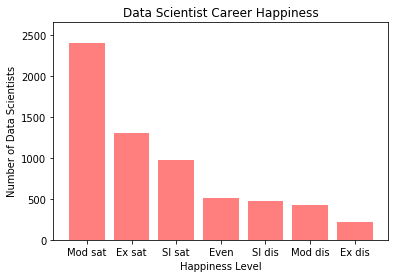

In [51]:
x_axis = np.arange(len(career_sat))
plt.bar(x_axis, career_sat, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Mod sat", "Ex sat", "Sl sat", "Even", "Sl dis", "Mod dis", "Ex dis"])
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(career_sat)+250)
plt.title("Data Scientist Career Happiness")
plt.xlabel("Happiness Level")
plt.ylabel("Number of Data Scientists")
_ = plt.plot()

In [91]:
age_sat = data_scientist_survey['Age'].value_counts()
print(data_scientist_survey['Age'].value_counts())

25 - 34 years old     2512
18 - 24 years old     1194
35 - 44 years old      855
45 - 54 years old      261
Under 18 years old     117
55 - 64 years old       83
65 years or older       15
Name: Age, dtype: int64


In [32]:
age_ranges = [(data_scientist_survey['Age'] == 'Under 18 years old'),
                      (data_scientist_survey['Age'] == '18 - 24 years old'),
                      (data_scientist_survey['Age'] == '25 - 34 years old'),
                      (data_scientist_survey['Age'] == '35 - 44 years old'),
                      (data_scientist_survey['Age'] == '45 - 54 years old'),
                      (data_scientist_survey['Age'] == '55 - 64 years old'),
                      (data_scientist_survey['Age'] == '65 years or older')]

age_mid = [16, 21, 29.5, 39.5, 49.5, 59.5, 69.5]
data_scientist_survey['Age_mid_range'] = np.select(age_ranges, age_mid, default = np.NaN)
age_mid_range = data_scientist_survey['Age_mid_range']
age_mid_range.head()

18     NaN
28     NaN
40     NaN
62    29.5
86    21.0
Name: Age_mid_range, dtype: float64

# *useful: numpy.select

numpy.select(condlist, choicelist, default=0)[source]
Return an array drawn from elements in choicelist, depending on conditions.

In [123]:
conditions_sat = [(data_scientist_survey['JobSatisfaction'] == 'Extremely dissatisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Moderately dissatisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Slightly dissatisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Neither satisfied nor dissatisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Slightly satisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Moderately satisfied'),
                     (data_scientist_survey['JobSatisfaction'] == 'Extremely satisfied')]
    
choices_sat = [1, 2, 3, 4, 5, 6, 7]
data_scientist_survey['Conversion'] = np.select(conditions_sat, choices_sat, default = np.NaN)
job_sat_converted = data_scientist_survey['Conversion']
job_sat_mean = round(job_sat_converted.mean(), 2)
print(f'The mean job satisfaction score of data scientists is: {job_sat_mean}')

The mean job satisfaction score of data scientists is: 5.19


In [127]:
conditions_csat = [(data_scientist_survey['CareerSatisfaction'] == 'Extremely dissatisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Moderately dissatisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Slightly dissatisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Neither satisfied nor dissatisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Slightly satisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Moderately satisfied'),
                     (data_scientist_survey['CareerSatisfaction'] == 'Extremely satisfied')]
    
choices_csat = [1, 2, 3, 4, 5, 6, 7]
data_scientist_survey['car_Conversion'] = np.select(conditions_csat, choices_csat, default = np.NaN)
car_sat_converted = data_scientist_survey['car_Conversion']
car_sat_mean = round(car_sat_converted.mean(), 2)
print(f'The mean career satisfaction score of data scientists is: {car_sat_mean}')

The mean career satisfaction score of data scientists is: 5.22


In [25]:
age_sat = data_scientist_survey['Gender'].value_counts()
print(data_scientist_survey['Gender'].value_counts())

Male                                                                         4568
Female                                                                        350
Non-binary, genderqueer, or gender non-conforming                              27
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming      13
Female;Male                                                                    13
Male;Non-binary, genderqueer, or gender non-conforming                         11
Female;Non-binary, genderqueer, or gender non-conforming                        8
Female;Transgender                                                              7
Transgender                                                                     5
Transgender;Non-binary, genderqueer, or gender non-conforming                   5
Male;Transgender                                                                3
Female;Male;Transgender                                                         2
Female;Transgend

In [46]:
find_gender = [(data_scientist_survey['Gender'] == 'Male'),
               (data_scientist_survey['Gender'] == 'Female'),
               (data_scientist_survey['Gender'] != 'Male') & (data_scientist_survey['Gender'] != 'Female') 
                & (pd.isnull(data_scientist_survey['Gender']) == False)]
gender_options = ['Male', 'Female', 'Other']

data_scientist_survey['Gender_clean'] = np.select(find_gender, gender_options, default = np.NaN)
gender_narrowed = data_scientist_survey['Gender_clean']
gen_nar_values = gender_narrowed.value_counts()

In [99]:
data_scientist_survey
age_v_sat = pd.DataFrame()a 
age_v_sat = data_scientist_survey[['Age_mid_range', 'Conversion']]
age_v_sat = age_v_sat[pd.notnull(age_v_sat['Age_mid_range'])]
age_v_sat = age_v_sat[pd.notnull(age_v_sat['Conversion'])]
amr = age_v_sat['Age_mid_range']
conv = age_v_sat['Conversion']

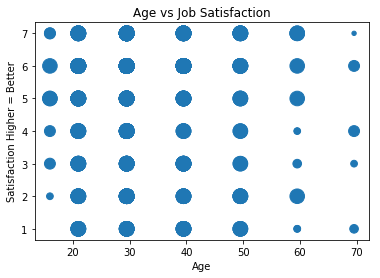

In [100]:
x = amr
y = conv
s = age_v_sat['Conversion'].value_counts()/8
plt.scatter(x, y, s)
plt.title("Age vs Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Satisfaction Higher = Better")
_ = plt.plot()

In [116]:
gender_v_sat = pd.DataFrame()
gender_v_sat = data_scientist_survey[['Gender_clean', 'Conversion']]
gender_v_sat = gender_v_sat[pd.notnull(gender_v_sat['Gender_clean'])]
gender_v_sat = gender_v_sat[pd.notnull(gender_v_sat['Conversion'])]
gend = gender_v_sat['Gender_clean']
conv = gender_v_sat['Conversion']

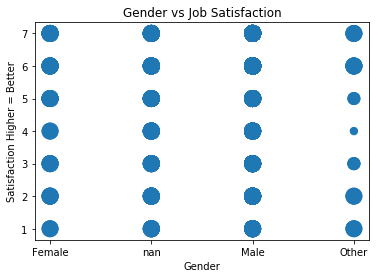

In [119]:
x = gend
y = conv
s2 = gender_v_sat['Conversion'].value_counts()/8
plt.scatter(x, y, s2)
plt.title("Gender vs Job Satisfaction")
plt.xlabel("Gender")
plt.ylabel("Satisfaction Higher = Better")
_ = plt.plot()

In [121]:
job_search = data_scientist_survey['JobSearchStatus'].value_counts()
print(data_scientist_survey['JobSearchStatus'].value_counts())

I’m not actively looking, but I am open to new opportunities    3700
I am not interested in new job opportunities                    1439
I am actively looking for a job                                 1129
Name: JobSearchStatus, dtype: int64


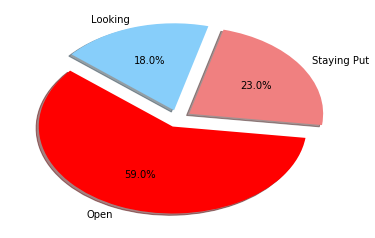

In [122]:
# Labels for the sections of our pie chart
labels = ["Open", "Staying Put", "Looking"]

# The colors of each section of the pie chart
colors = ["red", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, .1, .1)

plt.pie(job_search, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

_ = plt.plot()

##### 